In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
diamonds = pd.read_csv("dane/diamonds.csv",index_col="index")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


## Zwykły skatterplot

- jak rozwiązać problem wielkości punktu (kwargs)
- jak zmienić paletę barwną na spectral
- jak zredukować liczbę punktów (pandas)

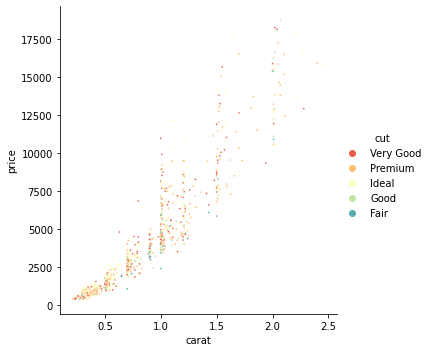

In [2]:
sns.relplot(diamonds.sample(1000),kind="scatter",x="carat",y="price",s=3,hue='cut',palette="Spectral")

## Relplot z podziałem na Facets

- jak sprawić aby kolumny zawinęły się
- Jak pololorować każdy z kolorów osobnym odcieniem (przygotowanie własnej palety)

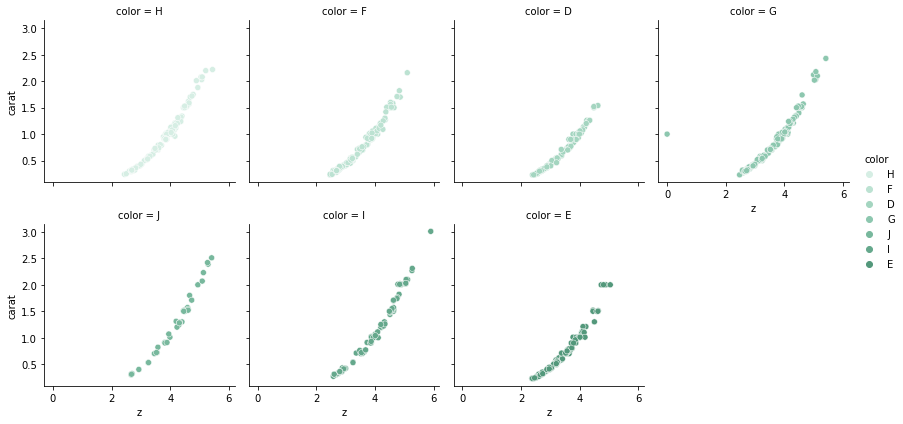

In [3]:
palette = sns.cubehelix_palette(start=2.2, rot=.0,n_colors=7,light=0.9,dark=0.5)
sns.relplot(diamonds.sample(1000),x="z",y="carat",col="color",col_wrap=4,height=3,hue="color",palette=palette)

## Przedstawienie zależności między kategoriami
- jak zmienić wykres aby były wyrównane w pionie (multiple)
- jak na osi y przedstawić zróżnicowanie pod względem innego parametru numerycznego (weights) 

<AxesSubplot:xlabel='cut', ylabel='Count'>

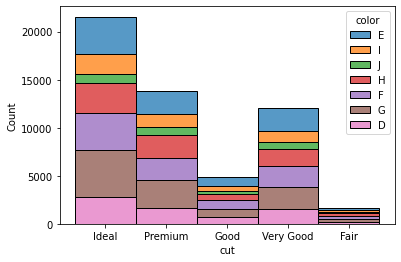

In [13]:

sns.histplot(diamonds,x="cut",hue="color",multiple="stack") 

[Text(0, 0.5, 'Price')]

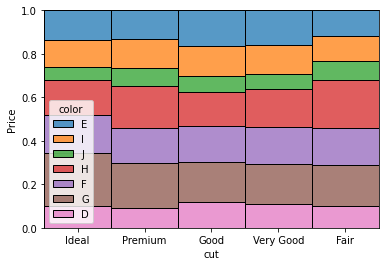

In [17]:
g = sns.histplot(diamonds,x="cut",hue="color",multiple="stack",weights="price") 
g.set(ylabel="Price")

## Pairplot
- Jak zróżnicować elementy wykresu pairplot
- Zmiana koloru, szerokości linii i wielkości punktu

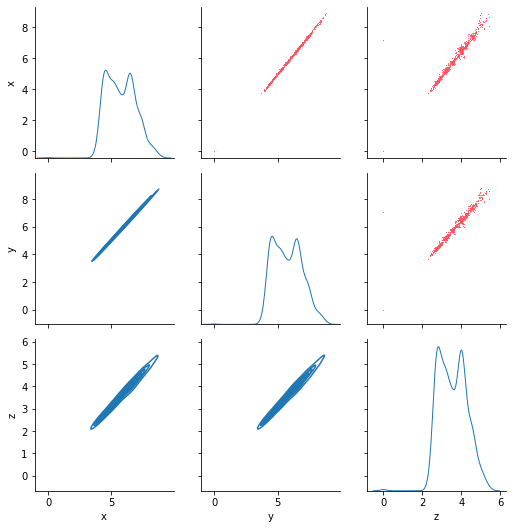

In [19]:
g = sns.PairGrid(diamonds.loc[:,["x","y","z"]].sample(1000))
g.map_upper(sns.scatterplot,s=1,color="#FF1122")
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=1, legend=False)

## Wykres punktowy przesdtawiający kilka zmiennych
- Jak zmodyfikować parametry wykresu 
- Jak zmienić paletę barwną i zakres skali markerów
- Jak zmienić osie na logarytmiczne
- Jak dodać własną siatkę

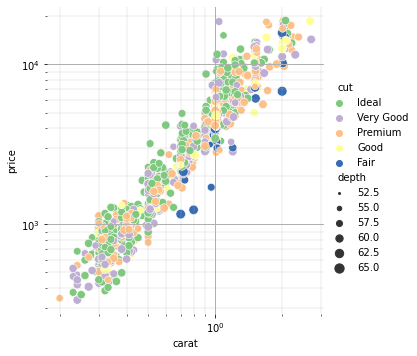

In [7]:
g = sns.relplot(
    diamonds.sample(1000),
    x="carat", y="price",
    hue="cut", size="depth",
    palette='Accent', sizes=(2, 100),
)

g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.xaxis.grid(True, "major", linewidth=1)
g.ax.yaxis.grid(True, "major", linewidth=1)
g.despine(left=True, bottom=True)

## Stripplot

- Jak połączyć dwa wykresy
- Jak dodać punkt wyznaczający środek wagowy rozkładu

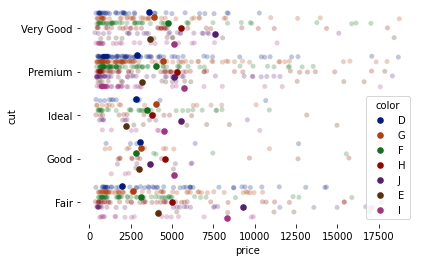

In [8]:

g = sns.stripplot(
    data=diamonds.sample(1000), y="cut", x="price", hue="color",palette="dark",
    dodge=True, alpha=.25, zorder=1, legend=False
)

sns.pointplot(
    data=diamonds.sample(1000), y="cut", x="price", hue="color",
    join=False, dodge=0.75, palette="dark",
    markers="o", scale=.75, errorbar=None, 
)
sns.despine(bottom=True, left=True)

## Joinplot

- Jak sformatować elementy wykresu z marginal plots

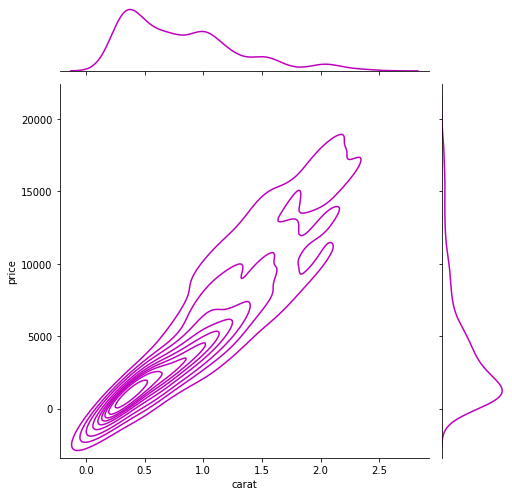

In [9]:
g = sns.jointplot(diamonds.sample(1000),
                x="carat", y="price",
                color="m", height=7,kind="kde")


## Boxplot
- Jak dodać własne kolory
- Jak zrobić poziomy boxplot

<AxesSubplot:xlabel='price', ylabel='cut'>

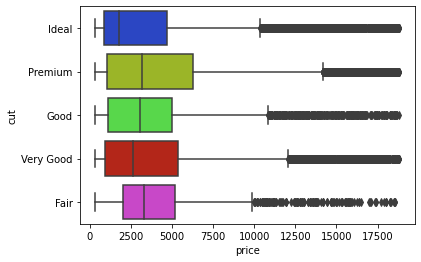

In [23]:
palette = sns.color_palette(["#1135DD","#AACC11","#45EE34","#cc1100","#dd33dd"])
sns.boxplot(diamonds,y="cut",x="price",palette=palette)